# Predicting Car Prices

## Introduction

In this guided project, we'll practice the machine learning workflow to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## Importing packages and datasets

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 99

The dataset does not include column names, so we must include them manually.

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('my_datasets/imports-85.data', names=cols)

In [3]:
#Number of rows and columns, and information about the content
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [4]:
#First 5 rows
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let's extract the columns with numeric values that will be used for predictions:

In [5]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 
                          'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [6]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [7]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?".

So now, we will:
- Replace these values and look for the presence of missing values in other numeric columns.
- Rescale the values in the numeric columns so they all range from 0 to 1.

In [8]:
numeric_cars["normalized-losses"].value_counts(dropna=False).head()

?      41
161    11
91      8
150     7
134     6
Name: normalized-losses, dtype: int64

Let's replace all the "?" from the dataframe by a "NaN" value

In [9]:
numeric_cars = numeric_cars.replace("?",np.nan)
numeric_cars["normalized-losses"].value_counts(dropna=False).head()

NaN    41
161    11
91      8
150     7
134     6
Name: normalized-losses, dtype: int64

We can now cast all the values to Float and check the final picture

In [10]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


There are not numeric columns (object type) due to the previous "?" symbol. Now there is a NaN instead, so we can convert all the values to "float".

It is not possible to convert them to "int" because NaN is not supported.

In [12]:
numeric_cars["normalized-losses"] = numeric_cars["normalized-losses"].astype(float)
numeric_cars["bore"] = numeric_cars["bore"].astype(float)
numeric_cars["stroke"] = numeric_cars["stroke"].astype(float)
numeric_cars["horsepower"] = numeric_cars["horsepower"].astype(float)
numeric_cars["peak-rpm"] = numeric_cars["peak-rpm"].astype(float)
numeric_cars["price"] = numeric_cars["price"].astype(float)

numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(3)
memory usage: 22.5 KB


In [13]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We can first remove the rows with no price:

In [14]:
numeric_cars = numeric_cars.dropna(subset=["price"])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In order not to remove to many rows, let's replace the NaN values by the mean value from its column:

In [15]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There are no NaN values in the dataframe anymore.

Let's normalize all the values, except the price:

In [16]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [17]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [18]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index).copy()

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

#iterate over numeric columns, except price, and compare rmse
rmse_dict = {}
col_names = numeric_cars.columns.drop("price")
for name in col_names:
    iteration_rmse = knn_train_test(name, "price", numeric_cars)
    rmse_dict[name] = iteration_rmse

rmse_series = pd.Series(rmse_dict)
rmse_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Let's modify the previous function to also include k as a parameter:

In [19]:
def knn_train_test(train_col, target_col, df, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index).copy()

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

#iterate over numeric columns, except price, and compare rmse
rmse_k_dict = {}
col_names = numeric_cars.columns.drop("price")
k_values = [1,3,5,7,9]

for name in col_names:
    name_dict={}
    for k in k_values:
        iteration_k_rmse = knn_train_test(name, "price", numeric_cars, k)
        name_dict[k] = iteration_k_rmse
    rmse_k_dict[name] = name_dict
    

rmse_k_dict

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

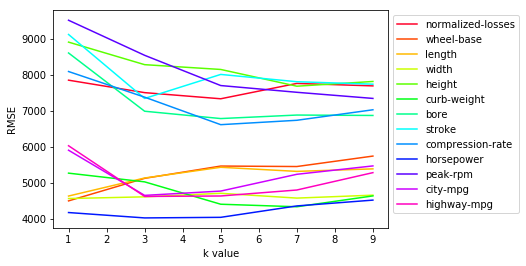

In [20]:
#choose colormap with lots of colors
cmap = plt.get_cmap('gist_rainbow')

#Divide colormap in 13 different parts (we have 13 series)
colors = [cmap(i) for i in np.linspace(0, 1, 13)]

i = 0
for k,v in rmse_k_dict.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label=k, color=colors[i])
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    i += 1

plt.legend(bbox_to_anchor=(1, 1))

The **minimum rmse** belongs to the prediction based on:
- "horsepower" feature.
- k=3

## Multivariate Model

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns. It will now **accept a list of column names (instead of just a string)**.

First, we will use the default k value:

In [21]:
#train_col is now a list instead of a string
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index).copy()

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_col], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_col])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

Let's check the best features from the previous section (univariate model):

In [22]:
mean_rmse = {}
for k,v in rmse_k_dict.items():
    y = list(v.values())
    mean_val = np.mean(y)
    mean_rmse[k] = mean_val

mean_rmse

{'normalized-losses': 7624.407150803994,
 'wheel-base': 5252.3924618645415,
 'length': 5176.394903761173,
 'width': 4618.910559617357,
 'height': 8163.346265875198,
 'curb-weight': 4730.075815236338,
 'bore': 7222.4724453254985,
 'stroke': 8000.240466568112,
 'compression-rate': 7166.0735987331045,
 'horsepower': 4219.377860395267,
 'peak-rpm': 8119.365233100782,
 'city-mpg': 5202.40900297338,
 'highway-mpg': 5069.469256447656}

In [23]:
mean_rmse_series = pd.Series(mean_rmse).sort_values()

mean_rmse_series

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

Now we will compare the predictions using the 2, 3, 4 and 5 best features, using the default k value:

In [24]:
best_features = list(mean_rmse_series.index)
multi_rmse_dict = {}

for num in range(2,6):
    multi_rmse = knn_train_test(best_features[:num],"price",numeric_cars)
    multi_rmse_dict[num] = multi_rmse
    
multi_rmse_dict

{2: 3589.3132622073304,
 3: 3305.9401397969677,
 4: 3358.6915801682458,
 5: 3665.546673045813}

The combination with less rmse is the one that predicts the price using the 3 best features:
- horsepower
- width
- curb-weight

## Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step. For the top 3 models in the last step, we can vary the hyperparameter "k" value from 1 to 25 and plot the resulting RMSE values:
1. Using 3 features: **horsepower, width, curb-weight**
2. Using 4 features: **horsepower, width, curb-weight, highway-mpg**
3. Using 2 features: **horsepower, width**

In [25]:
#train_col is a list os strings instead of a string
def knn_train_test(train_col, target_col, df, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index).copy()

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_col], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_col])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [26]:
#iterate over numeric columns, except price, and compare rmse
multi_rmse_k_dict = {}
k_values = range(1,26)

for num in range(2,5):
    name_dict={}
    for k in k_values:
        iteration_k_rmse = knn_train_test(best_features[:num], "price", numeric_cars, k)
        name_dict[k] = iteration_k_rmse
    multi_rmse_k_dict[str(num)+" features"] = name_dict
    

multi_rmse_k_dict

{'2 features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 '3 features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 43

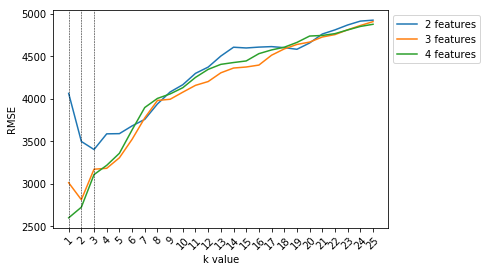

In [27]:
for k,v in multi_rmse_k_dict.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.axvline(x=1,color="black",ls="--",lw=0.5)
plt.axvline(x=2,color="black",ls="--",lw=0.5)
plt.axvline(x=3,color="black",ls="--",lw=0.5)
plt.xticks(range(1,26), rotation=45)    
plt.legend(bbox_to_anchor=(1, 1))

According to the plot, we can observe the following RMSE minimums:
- 2-best-features model with k=3: 3402
- 3-best-features model with k=2: 2813
- 4-best-features model with k=1: 2600

The best model would be the one using "horsepower", "width", "curb-weight" and "highway-mpg" for predictions with a hyperparameter "k"= 1